In [76]:
import sys
!{sys.executable} -m pip install nltk --quiet
!{sys.executable} -m pip install wordcloud --quiet
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [77]:
df = pd.read_csv('/content/MENTAL HEALTH.csv')
print(df.head())

/tmp/ipython-input-3972945821.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/MENTAL HEALTH.csv')


                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit Unnamed: 3  \
0  I have struggled with social anxiety from chil...   Anxiety        NaN   
1  Back in March (I know, a while ago D:), I woke...   Anxiety        NaN   
2  I've been withdrawing from medicines lately (e...   Anxiety        NaN   
3  First time poster, long time lurker. \n\nI've ...   Anxiety        NaN   
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN   

In [78]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'U

In [79]:
print("SHAPE BEFORE CLEANING: ", df.shape)

SHAPE BEFORE CLEANING:  (488738, 79)


In [80]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  
0  I have struggled with social anxiety from chil...   Anxiety  
1  Back in March (I know, a while ago D:), I woke...   Anxiety  
2  I've been withdrawing from medicines lately (e...   Anxiety  
3  First time poster, long time lurker. \n\nI've ...   Anxiety  
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety  


In [81]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit'], dtype='object')


In [82]:
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488738, 3)


In [83]:
df['Combined'] = df['Title'].fillna('') + ' ' + df['Text'].fillna('')

In [84]:
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I've been withdrawing from medicines lately (e...        Anxiety   
3       First time poster, long time lurker. \n\nI've ...        Anxiety   
4       Hi all,\n\nI made a throwaway account as my ma...        Anxiety   
...                                                   ...            ...   
488733  Ok! I've got a rant to make and a conversation...  schizophrenia   
488734  When I wake up, I rarely have any tics in my t...  schizophrenia   
488735  I’m not sure if this is schizophrenia (or perh...  schizophrenia   
488736  Although I don't think it was stated what Stef...  schizophrenia   
488737  It's really tough right now. We broke up due t...  schizophrenia   

                                                 Combined  
0       exposure does not work! I have struggled with ...  
1       Panic attack? derealization? can't go to docto...  
2       How long can a panic attack last?! I've been w...  
3       Stepping stones First time poster, long time l...  
4       Coping with anxiety over climate change, on th...  
...                                                   ...  
488733  Religion and paranoid conversation Ok! I've go...  
488734  Isn't this a little weird for being tardive dy...  
488735  Is this a symptom of schizophrenia or somethin...  
488736  Anyone seen the new Black Mirror episode Bande...  
488737  My girlfriend of over 1 year and I just broke ...  

[488738 rows x 4 columns]>

In [85]:
df['Combined'] = df['Combined'].str.lower()
df['Combined'] = df['Combined'].str.replace(r'[^a-z\s]', '', regex=True)
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I've been withdrawing from medicines lately (e...        Anxiety   
3       First time poster, long time lurker. \n\nI've ...        Anxiety   
4       Hi all,\n\nI made a throwaway account as my ma...        Anxiety   
...                                                   ...            ...   
488733  Ok! I've got a rant to make and a conversation...  schizophrenia   
488734  When I wake up, I rarely have any tics in my t...  schizophrenia   
488735  I’m not sure if this is schizophrenia (or perh...  schizophrenia   
488736  Although I don't think it was stated what Stef...  schizophrenia   
488737  It's really tough right now. We broke up due t...  schizophrenia   

                                                 Combined  
0       exposure does not work i have struggled with s...  
1       panic attack derealization cant go to doctors ...  
2       how long can a panic attack last ive been with...  
3       stepping stones first time poster long time lu...  
4       coping with anxiety over climate change on the...  
...                                                   ...  
488733  religion and paranoid conversation ok ive got ...  
488734  isnt this a little weird for being tardive dys...  
488735  is this a symptom of schizophrenia or somethin...  
488736  anyone seen the new black mirror episode bande...  
488737  my girlfriend of over  year and i just broke u...  

[488738 rows x 4 columns]>

In [86]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [88]:
print("Lemmatized Text Samples: \n")
for i in range(5):
    print(f"Post #{i + 1}: ")
    print(df['Combined'].iloc[i])
    print("-" * 80)

Lemmatized Text Samples: 

Post #1: 
exposure work struggled social anxiety childhood main advice friend selfhelp book professional expose environment im better example get anxious every single time go shop even though shopping daily weekly since get nervous sweaty heart pounding every time go gym yet working gym year exposure worked anyone else
--------------------------------------------------------------------------------
Post #2: 
panic attack derealization cant go doctor advice appreciated back march know ago woke day go school feeling kind felt depressed didnt really feel like getting even seeing anyone history p really mainly happens winter time get highly anxious also going anywhere period time get suspicious paranoid everyone anything usually end isolating room eat way less also get highly irritable emotional like one time mom sent store milk started cry store thought going killed watched believe period watched government something higher power im gerbil study something like t

In [89]:
df = df[df['Combined'].str.len() > 10]
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

,0
Title,5
Text,21
Subreddit,59
Combined,0


In [90]:
df[df.isnull().any(axis=1)]

,Title,Text,Subreddit,Combined
51758,"I Popped My Psych-Ward Cherry, Part II (Length...","Original Post \(possibly required reading, bu...",NaN,popped psychward cherry part ii lengthy amp vu...
51775,I’m maybe a society 6 but apparently a psych\-...,NaN,NaN,im maybe society apparently psychward
51777,"To Possibly Be Continued…""",Anxiety,NaN,possibly continued anxiety
88313,I am not asking for diagnosis.Just want to get...,Note: If you found your comments here is becau...,NaN,asking diagnosisjust want get rid doubt misdia...
88321,Things I read on this subreddit and i relate to:,NaN,NaN,thing read subreddit relate
...,...,...,...,...
480617,Title: Keratitis caused by a rare fungus,Malassezia restricta \(NCBI; US National Libr...,NaN,title keratitis caused rare fungus malassezia ...
480621,Title: Identification of Fungal Species in Bra...,NaN,NaN,title identification fungal specie brain tissu...
480625,§ “About 36 per cent of people with Alzheimer'...,study suggests; ScienceDaily; 2017\).,NaN,per cent people alzheimers thought delusion pe...
480627,Title: Schizophrenia as a prostaglandin defici...,NaN,NaN,title schizophrenia prostaglandin deficiency d...


In [91]:
df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)

/tmp/ipython-input-724578079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)


In [92]:
df.reset_index(drop=True, inplace=True)

In [93]:
df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
df['Combined'] = df['Combined'].str.replace('\n', ' ', regex=True)

/tmp/ipython-input-3396328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
/tmp/ipython-input-3396328298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
/tmp/ipython-input-3396328298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [94]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

,0
Title,0
Text,0
Subreddit,0
Combined,0


In [95]:
from IPython.display import display
display(df)

,Title,Text,Subreddit,Combined
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,exposure work struggled social anxiety childho...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,panic attack derealization cant go doctor advi...
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,long panic attack last ive withdrawing medicin...
3,Stepping stones,"First time poster, long time lurker. I've ha...",Anxiety,stepping stone first time poster long time lur...
4,"Coping with anxiety over climate change, on th...","Hi all, I made a throwaway account as my main...",Anxiety,coping anxiety climate change verge considerin...
...,...,...,...,...
488365,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,religion paranoid conversation ok ive got rant...
488366,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,isnt little weird tardive dyskinesia wake rare...
488367,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,symptom schizophrenia something else im sure s...
488368,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,anyone seen new black mirror episode bandersna...


/tmp/ipython-input-2076999871.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


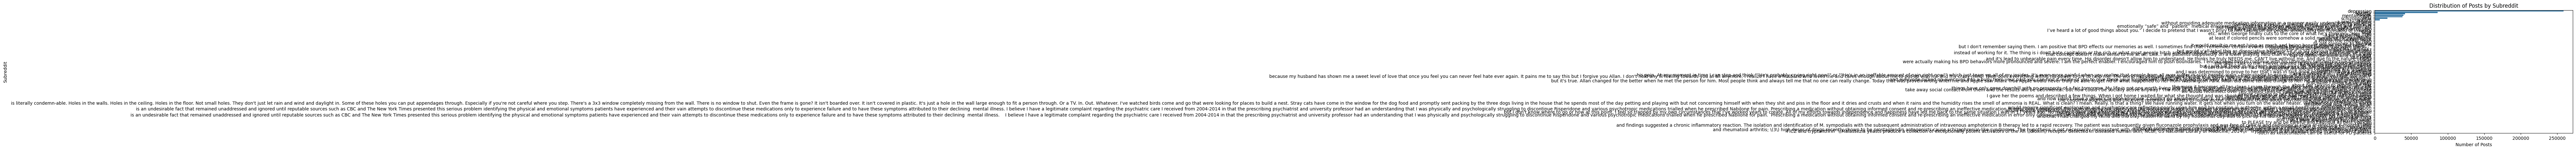

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

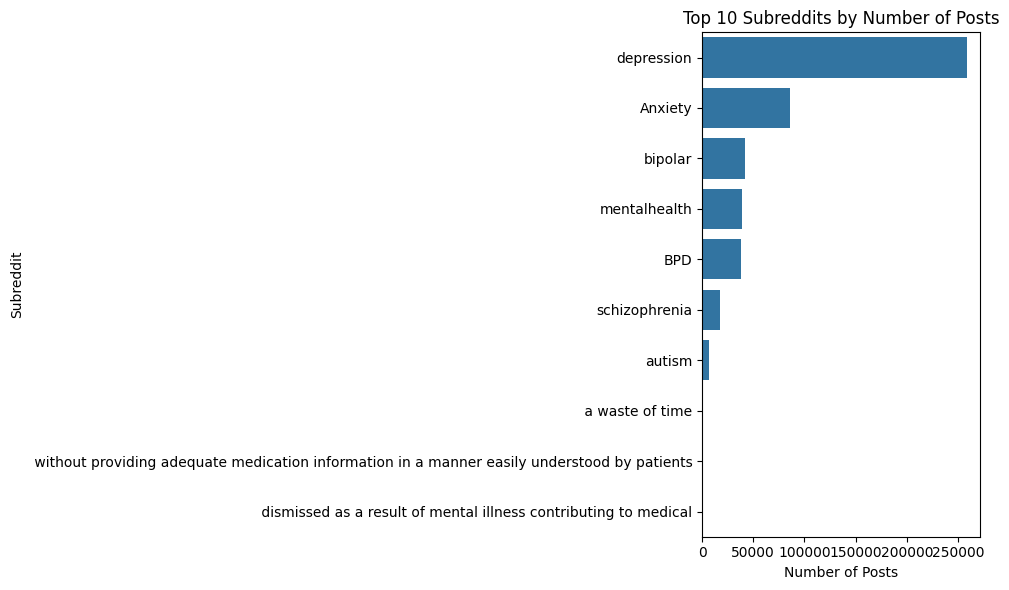

In [97]:
# Select top 10 subreddits by frequency
top_subreddits = df['Subreddit'].value_counts().nlargest(10).index

# Filter DataFrame
filtered_df = df[df['Subreddit'].isin(top_subreddits)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=top_subreddits)
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [98]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Replace all other subreddit values with NaN
df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))

# Drop rows where 'subreddit' is NaN (i.e., invalid or unwanted subreddits)
df.dropna(subset=['Subreddit'], inplace=True)
df.isnull().values.any()

/tmp/ipython-input-901992291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))
/tmp/ipython-input-901992291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Subreddit'], inplace=True)


np.False_

In [99]:
df.reset_index(drop=True, inplace=True)
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488290, 4)


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [101]:
def simple_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [102]:
import numpy as np

top_words_per_class = defaultdict(list)
vectorizer = CountVectorizer(max_features=1000)
for sub in df['Subreddit'].unique():
    texts = df[df['Subreddit'] == sub]['Combined']
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_class[sub] = sorted_words

In [103]:
top_words_per_class_df = pd.DataFrame({k: dict(v) for k, v in top_words_per_class.items()})
display(top_words_per_class_df)

,Anxiety,BPD,depression,autism,mentalhealth,bipolar,schizophrenia
im,175984.0,77657.0,572321.0,8736.0,91399.0,76890.0,25541.0
anxiety,134971.0,NaN,NaN,NaN,NaN,NaN,NaN
like,108884.0,55336.0,357849.0,6944.0,64663.0,42270.0,17842.0
feel,95581.0,48372.0,347381.0,NaN,55272.0,34966.0,11124.0
get,76372.0,28694.0,215583.0,4726.0,39487.0,26855.0,9677.0
dont,74699.0,39915.0,348088.0,4837.0,53528.0,30728.0,12483.0
ive,70119.0,27623.0,208386.0,NaN,37206.0,30047.0,8927.0
time,65522.0,29001.0,203922.0,3930.0,38434.0,26461.0,9591.0
know,65359.0,35717.0,236562.0,4814.0,43139.0,26539.0,11030.0
really,54580.0,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
!pip install evaluate --quiet
import torch
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, DataCollatorWithPadding
)
import evaluate
from collections import Counter
from sklearn.model_selection import train_test_split


In [105]:
# Ensure the text column exists: prefer your existing 'Combined'; otherwise Title + Text
if "Combined" in df.columns:
    text_col = "Combined"
else:
    text_col = "Combined"
    df[text_col] = (
        df["Title"].fillna("").astype(str) + " " + df["Text"].fillna("").astype(str)
    )

label_col = "Subreddit"  # labels come from Subreddit

# Basic cleanup
df = df.dropna(subset=[text_col, label_col]).reset_index(drop=True)
df[label_col] = df[label_col].astype(str)

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col].astype(str),
    df[label_col].astype(str),
    test_size=0.2,
    random_state=42,
    stratify=df[label_col].astype(str)
)

# Lists for HF Datasets
train_texts = X_train.tolist()
test_texts  = X_test.tolist()
train_labels_raw = y_train.tolist()
test_labels_raw  = y_test.tolist()

print(f"Train: {len(train_texts)} | Test: {len(test_texts)}")
print("Example text:", train_texts[0][:120])
print("Example label:", train_labels_raw[0])


Train: 390632 | Test: 97658
Example text: gpa tanking semester two exam right around terrible spike depression couple week ago recently got back terribly one line
Example label: depression


In [106]:
lbl = LabelEncoder()
lbl.fit(train_labels_raw + test_labels_raw)
train_labels = lbl.transform(train_labels_raw)
test_labels  = lbl.transform(test_labels_raw)

id2label = {i: lab for i, lab in enumerate(lbl.classes_)}
label2id = {lab: i for i, lab in id2label.items()}

print(f"Label set ({len(lbl.classes_)}): {list(lbl.classes_)}")
print("Train label distribution:", Counter(train_labels))


Label set (7): [np.str_('Anxiety'), np.str_('BPD'), np.str_('autism'), np.str_('bipolar'), np.str_('depression'), np.str_('mentalhealth'), np.str_('schizophrenia')]
Train label distribution: Counter({np.int64(4): 206713, np.int64(0): 68982, np.int64(3): 33182, np.int64(5): 31495, np.int64(1): 30553, np.int64(6): 13994, np.int64(2): 5713})


In [107]:
train_ds = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_ds  = Dataset.from_dict({"text": test_texts,  "label": test_labels})

In [108]:
model_name = "bert-base-uncased"  # change to another BERT if you prefer
tok = AutoTokenizer.from_pretrained(model_name)

def tok_fn(batch):
    return tok(batch["text"], truncation=True, max_length=256)

train_ds = train_ds.map(tok_fn, batched=True, remove_columns=["text"])
test_ds  = test_ds.map(tok_fn, batched=True, remove_columns=["text"])


Map:   0%|          | 0/390632 [00:00<?, ? examples/s]

Map:   0%|          | 0/97658 [00:00<?, ? examples/s]

In [109]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(lbl.classes_),
    id2label=id2label,
    label2id=label2id
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [110]:
!pip install -U transformers datasets accelerate evaluate --quiet

In [111]:
import transformers
print("Transformers version:", transformers.__version__)
print("Loaded from:", transformers.__file__)

Transformers version: 4.55.2
Loaded from: /usr/local/lib/python3.11/dist-packages/transformers/__init__.py


In [112]:
import transformers, inspect
from transformers import TrainingArguments

print("Transformers:", transformers.__version__)
print("TrainingArguments comes from:", TrainingArguments.__module__)
print("Qualified name:", TrainingArguments.__qualname__)
print("Init signature:\n", inspect.signature(TrainingArguments.__init__))


Transformers: 4.55.2
TrainingArguments comes from: transformers.training_args
Qualified name: TrainingArguments
Init signature:
 (self, output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.S

In [113]:
# Recommended
!pip install -U "transformers[torch]" "accelerate>=0.26.0" datasets evaluate --quiet

# If you prefer to pin versions:
# !pip install -U transformers==4.52.4 accelerate==0.31.0 datasets==3.0.2 evaluate==0.4.2


In [114]:
import transformers, accelerate, torch
print("transformers:", transformers.__version__)
print("accelerate:", accelerate.__version__)
print("torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


transformers: 4.55.2
accelerate: 1.10.0
torch: 2.6.0+cu124
CUDA available: True


In [122]:
import torch
from transformers import TrainingArguments

use_gpu = torch.cuda.is_available()
print("CUDA available:", use_gpu)
if use_gpu:
    print("GPU:", torch.cuda.get_device_name(0))
    cc_major, _ = torch.cuda.get_device_capability(0)
    USE_BF16 = cc_major >= 8    # Ampere+ → bf16
    USE_FP16 = not USE_BF16     # T4 → fp16
else:
    USE_BF16 = False
    USE_FP16 = False

args = TrainingArguments(
    output_dir="./bert_runs_full",
    eval_strategy="epoch",              # <- 4.55 name
    save_strategy="epoch",              # <- 4.55 name
    save_total_limit=2,
    learning_rate=2e-5,
    num_train_epochs=1,                 # start with 1; raise to 2–3 later
    weight_decay=0.01,

    # batching (safe for T4; increase if more VRAM)
    per_device_train_batch_size=8 if use_gpu else 8,
    per_device_eval_batch_size=16 if use_gpu else 8,
    gradient_accumulation_steps=4,      # 8 * 4 = 32 effective batch

    # throughput
    dataloader_num_workers=4,
    dataloader_pin_memory=True,
    group_by_length=True,

    # logging / best model
    logging_strategy="steps",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    greater_is_better=True,
    report_to="none",

    # device / precision
    use_cpu=not use_gpu,
    fp16=USE_FP16,
    bf16=USE_BF16,
)


CUDA available: True
GPU: NVIDIA A100-SXM4-40GB


In [123]:
import numpy as np
import torch
from transformers import Trainer, DataCollatorWithPadding
import evaluate

# Collator uses your tokenizer `tok`
data_collator = DataCollatorWithPadding(tokenizer=tok)

# Metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1_weighted": f1.compute(predictions=preds, references=labels, average="weighted")["f1"],
    }

trainer = Trainer(
    model=model,
    args=args,                     # <-- uses the TrainingArguments you set
    train_dataset=train_ds,        # <-- FULL train set
    eval_dataset=test_ds,          # <-- test/validation set
    tokenizer=tok,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


/tmp/ipython-input-2640661281.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [125]:
# 1) Dataset sizes
print("train_ds rows:", len(train_ds))
print("test_ds rows :", len(test_ds))

# 2) Trainer sees the same counts
print("trainer train rows:", trainer.train_dataset.num_rows)
print("trainer eval rows :", trainer.eval_dataset.num_rows)

# 3) After calling trainer.train(), HF logs will include:
# ***** Running training *****
#   Num examples = 390632
#   Num Epochs = 1
#   ...


train_ds rows: 390632
test_ds rows : 97658
trainer train rows: 390632
trainer eval rows : 97658


In [126]:
train_result = trainer.train()     # trains on FULL train_ds
trainer.save_model("./final_model_bert_full")
tok.save_pretrained("./final_model_bert_full")

print("Finished training on full train set.")
print(train_result.metrics)

# Save metrics & state (optional)
trainer.save_metrics("train", train_result.metrics)
trainer.save_state()


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted
1,0.589800,0.590916,0.809191,0.799808


Finished training on full train set.
{'train_runtime': 2132.3018, 'train_samples_per_second': 183.197, 'train_steps_per_second': 5.725, 'total_flos': 1.96480505235816e+16, 'train_loss': 0.6008800938432526, 'epoch': 1.0}


In [127]:
# Evaluate on the full test set (again) and save metrics
eval_metrics = trainer.evaluate(eval_dataset=test_ds)
print("\n=== Eval metrics (full test set) ===")
for k, v in eval_metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, (int, float)) else f"{k}: {v}")

trainer.save_metrics("eval", eval_metrics)   # writes to ./final_model_bert_full if you call from there



=== Eval metrics (full test set) ===
eval_loss: 0.5909
eval_accuracy: 0.8092
eval_f1_weighted: 0.7998
eval_runtime: 91.3316
eval_samples_per_second: 1069.2680
eval_steps_per_second: 66.8330
epoch: 1.0000


In [128]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Predict logits on test set
pred_out = trainer.predict(test_ds)
y_prob = pred_out.predictions
y_pred = y_prob.argmax(axis=1)
y_true = pred_out.label_ids

# Class names from your LabelEncoder
label_names = list(lbl.classes_)

print("\n=== Classification report (test) ===")
print(classification_report(y_true, y_pred, target_names=label_names, digits=4))

# Confusion matrix (counts)
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)
cm_df.to_csv("confusion_matrix.csv", index=True)
print("Saved confusion matrix -> confusion_matrix.csv")

# Per-example predictions file (label strings)
pred_df = pd.DataFrame({
    "true_label": [label_names[i] for i in y_true],
    "pred_label": [label_names[i] for i in y_pred],
})
pred_df.to_csv("test_predictions.csv", index=False)
print("Saved per-example predictions -> test_predictions.csv")



=== Classification report (test) ===
               precision    recall  f1-score   support

      Anxiety     0.8067    0.8131    0.8099     17246
          BPD     0.8080    0.6593    0.7261      7638
       autism     0.8722    0.8123    0.8412      1428
      bipolar     0.8120    0.6876    0.7446      8295
   depression     0.8335    0.9297    0.8790     51679
 mentalhealth     0.5811    0.3451    0.4330      7874
schizophrenia     0.6948    0.6678    0.6810      3498

     accuracy                         0.8092     97658
    macro avg     0.7726    0.7021    0.7307     97658
 weighted avg     0.8002    0.8092    0.7998     97658

Saved confusion matrix -> confusion_matrix.csv
Saved per-example predictions -> test_predictions.csv


In [129]:
import os, json
save_dir = "./final_model_bert_full"

# already saved model/tokenizer earlier; save label list too (optional)
with open(os.path.join(save_dir, "label_list.json"), "w") as f:
    json.dump(label_names, f)

# copy metrics/preds if you want them inside the folder
pred_df.to_csv(os.path.join(save_dir, "test_predictions.csv"), index=False)
cm_df.to_csv(os.path.join(save_dir, "confusion_matrix.csv"), index=True)
print(f"Artifacts saved under: {save_dir}")


Artifacts saved under: ./final_model_bert_full


In [131]:
import torch

id2label = {int(k): v for k, v in model.config.id2label.items()}

def predict_texts(text_list, max_length=256, batch_size=32):
    device = next(model.parameters()).device
    out = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        enc = tok(batch, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
        enc = {k: v.to(device) for k, v in enc.items()}
        with torch.no_grad():
            probs = torch.softmax(model(**enc).logits, dim=-1).cpu().numpy()
        ids = probs.argmax(axis=1)
        out.extend([(id2label[i], int(i), prob) for i, prob in zip(ids, probs)])
    return out



In [137]:
# quick demo
examples = [
    "I can't stop worrying and my heart races at night.",
    "My mood swings are exhausting and relationships are hard.",
    "Bright lights and store noises overwhelm me; I shut down after errands.",
    "Started meds recently; voices are quieter but concentration is still tough.",
    "Trying to find a therapist—how do I even start and what should I ask?",
    "My mood flips fast; one comment and I’m either idealizing or hating myself."

]
for text, (lab, lab_id, prob) in zip(examples, predict_texts(examples)):
    print(f"\nText: {text}\nPredicted: {lab} (id={lab_id})  confidence={prob.max():.3f}")



Text: I can't stop worrying and my heart races at night.
Predicted: Anxiety (id=0)  confidence=0.883

Text: My mood swings are exhausting and relationships are hard.
Predicted: depression (id=4)  confidence=0.408

Text: Bright lights and store noises overwhelm me; I shut down after errands.
Predicted: depression (id=4)  confidence=0.449

Text: Started meds recently; voices are quieter but concentration is still tough.
Predicted: schizophrenia (id=6)  confidence=0.928

Text: Trying to find a therapist—how do I even start and what should I ask?
Predicted: depression (id=4)  confidence=0.655

Text: My mood flips fast; one comment and I’m either idealizing or hating myself.
Predicted: BPD (id=1)  confidence=0.716


In [136]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch, numpy as np

load_dir = "./final_model_bert_full"
tok_loaded = AutoTokenizer.from_pretrained(load_dir)
model_loaded = AutoModelForSequenceClassification.from_pretrained(load_dir)
model_loaded.to("cuda" if torch.cuda.is_available() else "cpu").eval()
id2label_loaded = {int(k): v for k, v in model_loaded.config.id2label.items()}

def predict_with_loaded(texts, max_length=256):
    device = next(model_loaded.parameters()).device
    enc = tok_loaded(texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
    enc = {k: v.to(device) for k, v in enc.items()}
    with torch.no_grad():
        probs = torch.softmax(model_loaded(**enc).logits, dim=-1).cpu().numpy()
    ids = probs.argmax(axis=1)
    return [id2label_loaded[i] for i in ids], probs
